In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Load the dataset
dataset = pd.read_csv('internetreviews.csv')

In [4]:
dataset.head(10)

,id,score,review
0,0,Positive,Kokusu çok güzel etkisi de efsane
1,1,Negative,hiç bir fark olmadı siyah nokta silmedi
2,2,Positive,şeffaf güzel bir krem elimi yumuşacık yaptı
3,3,Positive,Özellikle karma ve hassas cildiniz varsa La Ro...
4,4,Negative,çok iyi nemlendiriyor ama daha ucuz muadilleri...
5,5,Neutral,Ürün fena değil güzel tabi öbür kimyasallar gi...
6,6,Negative,şampuan çok köttü
7,7,Negative,Ürün kullanıp memnun olduğum bir ürün fakat şi...
8,8,Neutral,yeni kullaniyorum dokulmeleri azaltır inşallah
9,9,Positive,Kesinlikle saçlarınızda sarı işlem barsa hafta...


In [5]:
# Filter the dataset to discard Neutral reviews
filtered_dataset = dataset[dataset['score'].isin(['Positive', 'Negative'])]

In [6]:
# Shuffle the filtered dataset
filtered_dataset = filtered_dataset.sample(frac=1).reset_index(drop=True)

In [7]:
filtered_dataset.head()

,id,score,review
0,80325,Positive,kargo çok hızlı geldi. ürünü kullanalı 3 gün o...
1,48531,Positive,"En sevdiğim maskara, gayet memnunum.Diğer mask..."
2,90552,Negative,Yıllardır bu ürünü kullanırım.bunda bir sıkınt...
3,31785,Negative,Herkes işe yarıyor demiş ama işe yaramadı bend...
4,61551,Negative,kalitesiz ürün iade


In [8]:
# Encode the sentiment labels
label_encoder = LabelEncoder()
filtered_dataset['score'] = label_encoder.fit_transform(filtered_dataset['score'])

In [9]:
# Split dataset into train and test sets
X = filtered_dataset['review'].values
y = filtered_dataset['score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [11]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [12]:
# Pad sequences to ensure uniform length
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

In [14]:
# Build the deep learning model
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim),
    LSTM(64, input_shape=(maxlen, embedding_dim)),  # Specify input_length here
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\hsyn_\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [17]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 145s 63ms/step - accuracy: 0.8931 - loss: 0.2551 - val_accuracy: 0.9479 - val_loss: 0.1367
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 140s 62ms/step - accuracy: 0.9695 - loss: 0.0954 - val_accuracy: 0.9479 - val_loss: 0.1524
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 134s 60ms/step - accuracy: 0.9791 - loss: 0.0655 - val_accuracy: 0.9452 - val_loss: 0.1598
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 121s 54ms/step - accuracy: 0.9835 - loss: 0.0517 - val_accuracy: 0.9451 - val_loss: 0.1936


In [18]:
# Evaluate the model
train_acc = model.evaluate(X_train_pad, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test_pad, y_test, verbose=0)[1]

In [19]:
# Print model summary
print("Model Summary:")
print(model.summary())

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (32, 100, 100)         │     5,885,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (32, 64)               │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,796,197 (67.89 MB)

 Trainable params: 5,932,065 (22.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,864,132 (45.26 MB)

None


In [20]:
# Print model training parameters
print("\nModel Training Parameters:")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Model Training Parameters:
Training Accuracy: 0.9689124822616577
Test Accuracy: 0.9504500031471252


In [21]:
# Make predictions for the provided comments
comments = [
    'bu zamana kadar birçok Ürün kullandım ama bu tamamen başka, tam bir fiyat performans ürünü kesinlikle tavsiye ederim.',
    'Daha henüz deneme fırsatım olmadı, deneyince yorumumu güncellerim.',
    'babama almıştım, o kadar güzel ki bir tane de kendime sipariŞ verdim.',
    'bu devirde bu kadar berbat bir ürünü yapmakta ayrı bir marifet, kesinlikle almayın.',
    'slm ürünü heyecanla açtım ama sonuç tam bir hayal kırıklığğı,'
]

In [22]:
# Tokenize and pad sequences for the comments
comments_seq = tokenizer.texts_to_sequences(comments)
comments_pad = pad_sequences(comments_seq, maxlen=maxlen)

In [23]:
# Make predictions
predictions = model.predict(comments_pad)
binary_predictions = (predictions > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [24]:
# Decode the predictions
decoded_predictions = label_encoder.inverse_transform(binary_predictions.flatten())

In [25]:
# Make predictions for train and test sets
y_train_pred_probs = model.predict(X_train_pad)
y_test_pred_probs = model.predict(X_test_pad)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


In [26]:
# Convert probabilities to binary predictions using a threshold of 0.5
y_train_pred = (y_train_pred_probs > 0.5).astype(int)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

In [27]:
# Generate confusion matrix for train and test results
conf_mat_train = confusion_matrix(y_train, y_train_pred)
conf_mat_test = confusion_matrix(y_test, y_test_pred)

In [28]:
# Print confusion matrix
print("\nConfusion Matrix - Train:")
print(conf_mat_train)
print("\nConfusion Matrix - Test:")
print(conf_mat_test)


Confusion Matrix - Train:
[[38422  1641]
 [  846 39091]]

Confusion Matrix - Test:
[[9324  613]
 [ 378 9685]]


In [29]:
# Print prediction results for provided comments
print("\nPrediction Results for Provided Comments:")
for comment, prediction in zip(comments, decoded_predictions):
    print(f"Comment: {comment}, Predicted Label: {prediction}")


Prediction Results for Provided Comments:
Comment: bu zamana kadar birçok Ürün kullandım ama bu tamamen başka, tam bir fiyat performans ürünü kesinlikle tavsiye ederim., Predicted Label: Positive
Comment: Daha henüz deneme fırsatım olmadı, deneyince yorumumu güncellerim., Predicted Label: Positive
Comment: babama almıştım, o kadar güzel ki bir tane de kendime sipariŞ verdim., Predicted Label: Positive
Comment: bu devirde bu kadar berbat bir ürünü yapmakta ayrı bir marifet, kesinlikle almayın., Predicted Label: Negative
Comment: slm ürünü heyecanla açtım ama sonuç tam bir hayal kırıklığğı,, Predicted Label: Negative


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

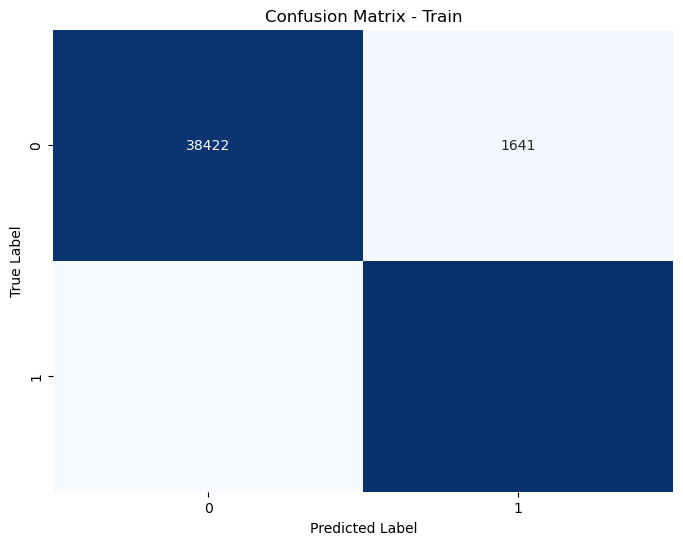

In [31]:
# Plot confusion matrix for train set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Train")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("confusion_matrix_train.jpg")

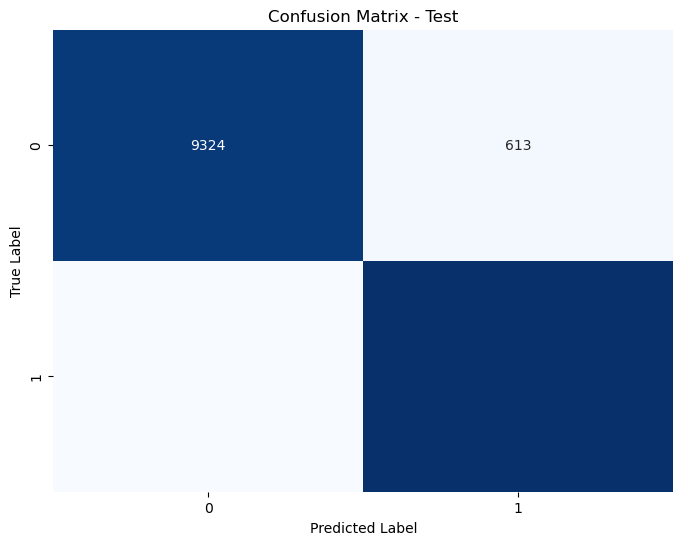

In [32]:
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("confusion_matrix_test.jpg")
plt.show()